# Fashion-MNIST - CNN

This introduction exercise demonstrates classification with the following key steps:

- **Dataset** (Exploring FashionMNIST  and common error)
- **Data Loader** (Exploring batches principle)
- **Simple Model Class**
    - Layer stack with `nn.Sequence`
    - SGD for optimizer
    - `nn.CrossEntropyLoss()` for loss function
- **Training Loop** (Training the Model)
- **Model Summary** (Model summary layer by layer)
- **Evaluation** (Accuracy and Visualizing with Confussion Matrix)
- **Save and Load Model** (Save method comparison)
- **Making Predictions**


* Dataset : https://pytorch.org/vision/main/datasets.html
* Fashion-MNIST link:
 - https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html#torchvision.datasets.FashionMNIST
 - https://github.com/zalandoresearch/fashion-mnist/tree/master/data


*Note: Gogle colab*

In [1]:
# Import Pytorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib
import matplotlib.pyplot as plt

# Dataset

## Get dataset


**Parameter**

* `root` (str or `pathlib.Path`) – Root directory of dataset where `FashionMNIST/raw/train-images-idx3-ubyte` and F`ashionMNIST/raw/t10k-images-idx3-ubyte` exist.

* `train` (*bool, optional*) – If True, creates dataset from `train-images-idx3-ubyte`, otherwise from `t10k-images-idx3-ubyte`.

* `download` (*bool, optional*) – If True, downloads the dataset from the internet and puts it in root directory. If dataset is already downloaded, it is not downloaded again.

* `transform` (*callable, optional*) – A function/transform that takes in a PIL image and returns a transformed version. E.g, `transforms.RandomCrop`

* `target_transform` (*callable, optional*) – A function/transform that takes in the target and transforms it.

In [2]:
# Training dataset
train_data = datasets.FashionMNIST(
    root="data", # Directory to put downloaded dataset
    train="True", # Get training dataset train-images-idx3-ubyte
    download="True", # See above 😉
    transform=ToTensor(), # Transform image to tensor
    target_transform=None # To transform to tenser
)

# Test dataset
test_data = datasets.FashionMNIST(
    root="data",
    train="False", # Get test dataset 👌 - t10k-images-idx3-ubyte
    download="True",
    transform=ToTensor()
)

100%|██████████| 26.4M/26.4M [00:02<00:00, 13.2MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 212kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.90MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 2.51MB/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
# Lets check how many dataset available
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 60000, 60000)

In [4]:
# Check what classes/label available
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

## Data Visualizing

## DataLoader

In [5]:
from torch.utils.data import DataLoader

# Batch size
BATCH_SIZE = 32

# Turn dataset to batches
train_loader = DataLoader(train_data, # Pick train data
                          batch_size=BATCH_SIZE, # Make it batches
                          shuffle=True # We will shuffle every epoch
                          )
test_loader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

In [6]:
# Checking
print(f"Length of train dataloader: {len(train_loader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_loader)} batches of {BATCH_SIZE}")
print(f"Length of train data: {len(train_data)}")
print(f"Length of test data: {len(test_data)}")

Length of train dataloader: 1875 batches of 32
Length of test dataloader: 1875 batches of 32
Length of train data: 60000
Length of test data: 60000


In [7]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_loader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

# CNN Model

`nn.Flatten()` is similar to `reshape`, but it specifically flattens the input data while preserving the batch dimension.

The key difference is that when using `nn.Flatten()`, it automatically ensures that the batch size remains intact, so the flattening happens only on the non-batch dimensions. In contrast, `reshape` can change the batch size if you're not careful.

With `nn.Flatten()`, you don't need to worry about manually specifying the batch size—PyTorch takes care of that for you.

In [8]:
# Calling nn.Flatten()
flatten_model = nn.Flatten()

# Get single sample
X = train_features_batch[0]

# Flatten sample data
output = flatten_model(X) # Forward pass step, because all mm modules can do a forward pass

# Print out what happened
print(f"Shape before flattening: {X.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]\n")


# print(X)
# print(output)

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]



## Model Class

CNN Structure:

`Input layer -> [Convolutional layer -> activation layer -> pooling layer] -> Output layer`.

And we can repeated `[Convolutional layer -> activation layer -> pooling layer]` depending on requirements

In [9]:
# CNN Class Model
class FMNISTModelCNN(nn.Module):
  def __init__(self, input, hidden_layer, output):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input,
                  out_channels=hidden_layer,
                  kernel_size=3,
                  padding=1,
                  stride=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_layer,
                  out_channels=hidden_layer,
                  kernel_size=3,
                  padding=1,
                  stride=1),
        nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_layer,
                  out_channels=hidden_layer,
                  kernel_size=3,
                  padding=1,
                  stride=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_layer,
                  out_channels=hidden_layer,
                  kernel_size=3,
                  padding=1,
                  stride=1),
        nn.MaxPool2d(2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_layer*7*7, out_features=output)
    )
  def forward(self, x):
    x = self.conv_block_1(x)
    # print(x.shape)
    x = self.conv_block_2(x)  # Second convolution block (with pooling)
    # print(x.shape)
    return self.classifier(x)


## Model initializing

In [10]:
torch.manual_seed(42)
model = FMNISTModelCNN(input=1, hidden_layer=10, output=len(class_names))

# Loss Function
loss_fn = nn.CrossEntropyLoss()

# Optimizer
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.1)

model

FMNISTModelCNN(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

## Taning Loop

In [11]:
num_epochs = 3

# train_losses_per_epoch = []  # To store average train losses per epoch
# test_losses_per_epoch = []   # To store average test losses per epoch

for epoch in range(num_epochs):
    print(f"Epoch: {epoch+1}\n-------")

    train_losses = []
    test_losses = []

    # Looping through batches
    for batch, (inputs, labels) in enumerate(train_loader):
        model.train()

        # Forward pass (Training)
        y_pred = model(inputs)

        # Calculate loss (Training)
        train_loss = loss_fn(y_pred, labels)
        train_losses.append(train_loss.item())

        # Optimizer zero grad
        optimizer.zero_grad()

        # Backward pass
        train_loss.backward()

        # Optimizer step
        optimizer.step()

        # TESTING (Evaluation)
        model.eval()
        with torch.no_grad():  # Use no_grad() to save memory during inference
            test_pred = model(inputs)
            test_loss = loss_fn(test_pred, labels)
            test_losses.append(test_loss.item())

        if batch % 400 == 0:
            print(f"Looked at batch {batch * len(inputs)}/{len(train_data)} samples")

    # Calculate average losses for the epoch
    avg_train_loss = sum(train_losses) / len(train_losses)
    avg_test_loss = sum(test_losses) / len(test_losses)

    # Append the average losses of the epoch to the lists for plotting
    # train_losses_per_epoch.append(avg_train_loss)
    # test_losses_per_epoch.append(avg_test_loss)

    print(f"\nTrain loss: {avg_train_loss:.5f} | Test loss: {avg_test_loss:.5f}\n")

Epoch: 1
-------
Looked at batch 0/60000 samples
Looked at batch 12800/60000 samples
Looked at batch 25600/60000 samples
Looked at batch 38400/60000 samples
Looked at batch 51200/60000 samples

Train loss: 0.51197 | Test loss: 0.34809

Epoch: 2
-------
Looked at batch 0/60000 samples
Looked at batch 12800/60000 samples
Looked at batch 25600/60000 samples
Looked at batch 38400/60000 samples
Looked at batch 51200/60000 samples

Train loss: 0.33762 | Test loss: 0.19949

Epoch: 3
-------
Looked at batch 0/60000 samples
Looked at batch 12800/60000 samples
Looked at batch 25600/60000 samples
Looked at batch 38400/60000 samples
Looked at batch 51200/60000 samples

Train loss: 0.29944 | Test loss: 0.16794



## Model Summary

In [14]:
!pip install torchinfo

In [15]:
from torchinfo import summary

In [16]:
batch_size = 32
summary(model, input_size=(batch_size, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
FMNISTModelCNN                           [32, 10]                  --
├─Sequential: 1-1                        [32, 10, 14, 14]          --
│    └─Conv2d: 2-1                       [32, 10, 28, 28]          100
│    └─ReLU: 2-2                         [32, 10, 28, 28]          --
│    └─Conv2d: 2-3                       [32, 10, 28, 28]          910
│    └─MaxPool2d: 2-4                    [32, 10, 14, 14]          --
├─Sequential: 1-2                        [32, 10, 7, 7]            --
│    └─Conv2d: 2-5                       [32, 10, 14, 14]          910
│    └─ReLU: 2-6                         [32, 10, 14, 14]          --
│    └─Conv2d: 2-7                       [32, 10, 14, 14]          910
│    └─MaxPool2d: 2-8                    [32, 10, 7, 7]            --
├─Sequential: 1-3                        [32, 10]                  --
│    └─Flatten: 2-9                      [32, 490]                 --
│    └─Line

# Evaluation

In [17]:
!pip install torchmetrics
!pip install tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 100.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 80.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 93.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [18]:
from tqdm import tqdm
import torchmetrics
from torchmetrics.classification import Accuracy

In [19]:
# Get the device where the model and tensors are located:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


Using device: cuda


In [20]:
import torchmetrics
from tqdm import tqdm

# Initialize accuracy metric from torchmetrics
accuracy_metric = torchmetrics.Accuracy(task='multiclass', num_classes=10).to(device)

# Make prediction with trained model
eval_preds = []
eval_labels = []
model.eval()

with torch.inference_mode():
    for inputs, labels in tqdm(test_loader, desc="Making prediction"):
        inputs, labels = inputs.to(device), labels.to(device)

        # Do the forward pass
        outputs = model(inputs)

        # Turn predictions from logits -> prediction probabilities -> prediction labels
        eval_pred = torch.softmax(outputs, dim=1).argmax(dim=1)

        # Append predictions and true labels for calculating accuracy
        eval_preds.append(eval_pred.cpu())
        eval_labels.append(labels.cpu())

        # Update the accuracy metric with predictions and labels
        accuracy_metric.update(eval_pred, labels)

# Concatenate list of predictions into a tensor (if you want the full tensor for analysis)
eval_pred_tensor = torch.cat(eval_preds)
eval_labels_tensor = torch.cat(eval_labels)

# Compute the final accuracy
final_accuracy = accuracy_metric.compute()

print(f"\nTest Accuracy: {final_accuracy*100:.4f}")


Making prediction: 100%|██████████| 1875/1875 [00:14<00:00, 130.00it/s]



Test Accuracy: 88.8683


In [21]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

In [22]:
conf_mat = ConfusionMatrix(num_classes=len(class_names), task="multiclass")
conf_mat_tensor = conf_mat(preds=eval_pred_tensor, target=test_data.targets)

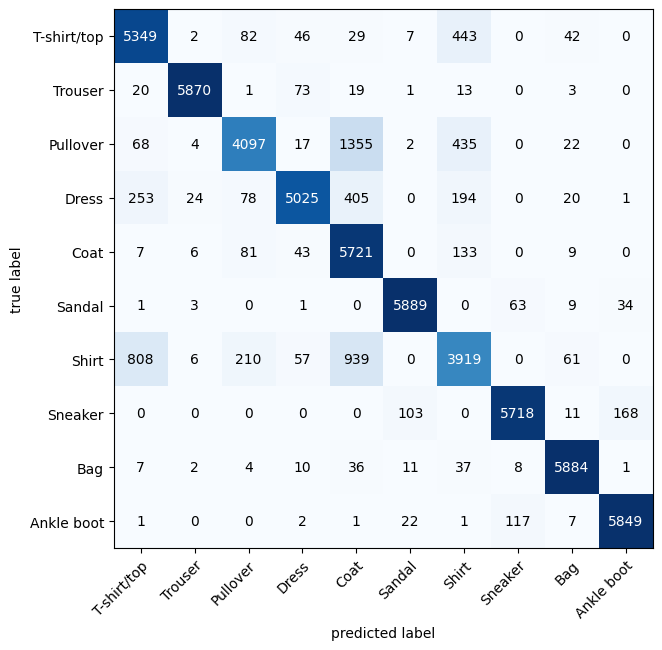

In [23]:
fig, ax = plot_confusion_matrix(
    conf_mat_tensor.numpy(), # matplotlib likes working with NumPy
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
);

# Save and Load Model

## Save Model



### 1. Saving the Entire Model
`torch.save(model, 'model.pth')`

- **Description**: This method saves the entire model, including both its architecture (the model class) and the learned parameters (weights). When you save the entire model, you can directly load it without needing to define the model architecture again.

- **Use Case**:
  - **When to use**: This is useful if you're working in a controlled environment where the model code is guaranteed to be the same when loading. For example, you might use this in an environment where you know the model code won't change, or you're just quickly saving and loading the model for evaluation.
  
  - **Limitations**:
    - This approach is less flexible because it saves the model class with the exact architecture, meaning you can't easily load it into a different architecture or adapt it for minor changes.
    - It may have issues with code changes if your model code has been updated (e.g., adding new layers, changing the structure).

- **Loading**:
  ```python
  model = torch.load('model.pth')
  ```

---

### 2. Saving Only the `state_dict()`
`torch.save(model.state_dict(), 'model_state_dict.pth')`

- **Description**: This saves only the model's learned parameters (weights) — not the actual model class or architecture. When you save the `state_dict()`, you must recreate the model's architecture manually when loading.

- **Use Case**:
  - **When to use**: This is the most common and recommended approach. It allows you to modify or extend your model's architecture while keeping the same learned weights. It's suitable for:
    - **Fine-tuning**: You can use a pre-trained model's weights and load them into a new model architecture (e.g., transferring learned features from a CNN to a different model).
    - **Resuming Training**: If you want to resume training later or in a different environment (e.g., different machine or setup).
  
  - **Advantages**: More flexible than saving the whole model. The model architecture is not tied to the saved state dict.

- **Loading**:
  ```python
  # First, initialize the model architecture
  model = YourModelClass()
  model.load_state_dict(torch.load('model_state_dict.pth'))
  model.eval()  # If you’re just evaluating
  ```

---

### 3. Saving the Optimizer's `state_dict()`

`torch.save(optimizer.state_dict(), 'optimizer_state_dict.pth')`

- **Description**: This saves the optimizer's state (such as momentum, learning rate, etc.) so you can resume training exactly from where you left off. It only saves the parameters related to the optimizer, not the model itself.

- **Use Case**:
  - **When to use**: If you're training a model and want to be able to resume training later without losing the optimizer’s state (such as momentum or learning rate schedule). This is particularly useful in long training processes where you might need to stop and resume (e.g., due to system shutdown or interruptions).
  
  - **Limitations**: The optimizer's state is dependent on the model's state (so you also need to save the model's weights to fully resume training). This doesn't include the model itself, so it's not useful for inference purposes.

- **Loading**:
  ```python
  optimizer = torch.optim.Adam(model.parameters())  # Recreate optimizer
  optimizer.load_state_dict(torch.load('optimizer_state_dict.pth'))
  ```

---

### 4. Saving Both Model and Optimizer

`torch.save({'epoch': epoch, 'model_state_dict': model.state_dict(), 'optimizer_state_dict': optimizer.state_dict(), 'loss': loss}, 'checkpoint.pth')`

- **Description**: This saves multiple things into one file, such as the model's state dict, the optimizer's state dict, the epoch number, and any other relevant information (e.g., loss value). This is typically used for checkpointing during training.

- **Use Case**:
  - **When to use**: When you want to save everything necessary to resume training from a specific point. This is useful in situations where you need:
    - **Checkpointing**: You’re training a model over multiple epochs and want to be able to resume from any point in the training process.
    - **Monitoring Progress**: You can save not just the model and optimizer, but also other training details (e.g., loss, epoch count, etc.) so you can continue training without losing any information.

  - **Advantages**: Everything needed to resume training (model, optimizer, training state) is saved in one file, which simplifies loading and resuming the process.

- **Loading**:
  ```python
  checkpoint = torch.load('checkpoint.pth')
  model.load_state_dict(checkpoint['model_state_dict'])
  optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
  epoch = checkpoint['epoch']
  loss = checkpoint['loss']
  ```

---

**Key Considerations:**

- **Saving/Loading Efficiency**: Saving just the `state_dict()` is usually more efficient and portable. Saving the entire model may result in larger files and fewer guarantees if you update the code in the future.
  
- **Flexibility**: Saving the `state_dict()` offers more flexibility, especially for fine-tuning or transferring learned weights between models.
  
- **Resuming Training**: If you’re continuing training (for example, after stopping due to a system shutdown), saving both the model’s and optimizer’s state is important to retain training progress.

- **Deployment**: If you only need the model for inference (not training), saving just the `state_dict()` and then loading it into a model class at deployment is typically the best practice.



In [24]:
from pathlib import Path

# Create models directory (if it doesn't already exist)
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create model save path
MODEL_NAME = "fashion_mnist_cnn.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save model state dict
torch.save(obj=model.state_dict(),
           f=MODEL_SAVE_PATH)
print(f"Saving model to: {MODEL_SAVE_PATH}")

Saving model to: models/fashion_mnist_cnn.pth


## Load Model

In [31]:
# Create a new instance of FashionMNISTModelV2 (the same class as our saved state_dict())
# Note: loading model will error if the shapes here aren't the same as the saved version
loaded_model = FMNISTModelCNN(input=1,
                                    hidden_layer=10, # try changing this to 128 and seeing what happens
                                    output=10)

# Load in the saved state_dict()
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH, weights_only=True))

# Send model to GPU
loaded_model = loaded_model.to(device)

## Making Prediction

In [32]:
# Make prediction to random test sample and plot
import random
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")



Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 6 (Shirt)


In [35]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0).to(device) # Add an extra dimension and send sample to device

            # Forward pass (model outputs raw logit)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 1, so can perform on dim=0)

            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs).argmax(dim=1)

In [36]:
# Make predictions on test samples with model 2
pred_probs= make_predictions(model=loaded_model,
                             data=test_samples)
pred_probs

tensor([4, 7, 5, 7, 5, 1, 8, 9, 4])

In [37]:
test_labels

[6, 7, 5, 7, 5, 1, 8, 9, 4]

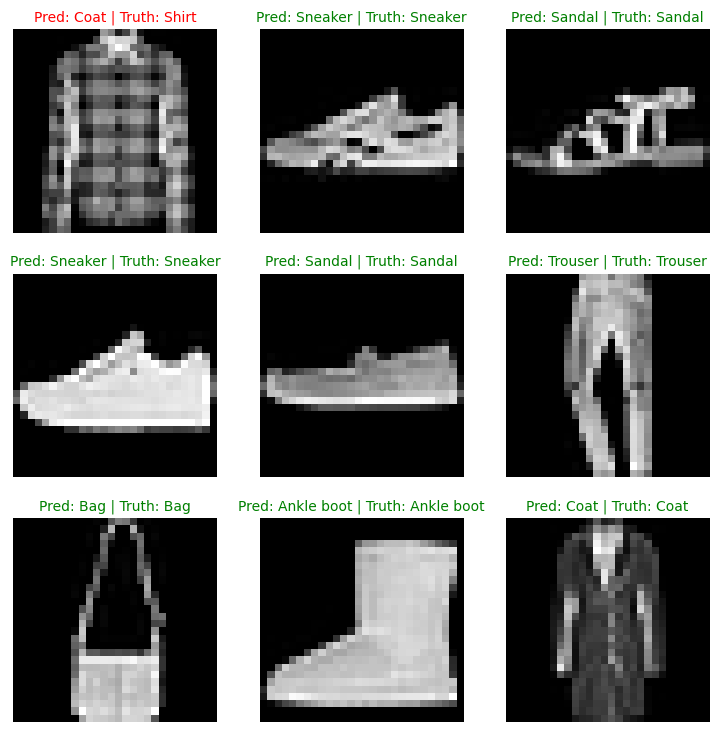

In [39]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = class_names[pred_probs[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = class_names[test_labels[i]]

    # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);